# Object Recognition AI workshop - Broccolli or Cucumber?

In this workshop, we will be demonstrating the python code behind the scenes to build a CNN Object Recognition model with some data from your favourite vegetables.

### Step 1. Install needed packages

This is a command to install several Python libraries using `pip`, the package installer for Python. Here's a breakdown of what each part does:

- `!pip install`: The `!` at the beginning is used in Jupyter notebooks to run shell commands. `pip install` is the command to install Python packages.
- `numpy`: A library for numerical computations, particularly useful for working with arrays and matrices.
- `matplotlib`: A plotting library for creating static, animated, and interactive visualizations in Python.
- `tensorflow`: An open-source library for machine learning and artificial intelligence, particularly for building and training neural networks.
- `keras`: A high-level neural networks API, written in Python and capable of running on top of TensorFlow.
- `--quiet`: This option reduces the amount of output shown during the installation process, making it less verbose.

So, this command installs the `numpy`, `matplotlib`, `tensorflow`, and `keras` libraries quietly, without displaying too much information during the installation process.

In [4]:
# Install necessary packages
!pip install numpy matplotlib tensorflow keras --quiet
print("All required libraries installed (i.e. Numpy, Matplotlib, Tensorflow). Note that libraries: os, warnings")
print("are built in and do not need to be reinstalled" )

All required libraries installed (i.e. Numpy, Matplotlib, Tensorflow). Note that libraries: os, warnings
are built in and do not need to be reinstalled


### Step 2. Import the necessary libraries for our model to work

This code snippet imports several libraries and modules that are commonly used in machine learning and data processing tasks. 

This setup is typically used in a machine learning project involving image data. The imported libraries and modules provide the necessary tools for data manipulation, visualisation, building and training neural networks, and handling file operations.

Here's a breakdown of what each part does

2. **Library Functions**:
   - `numpy as np`: Imports NumPy, a library for numerical computations, and aliases it as `np`.
   - `matplotlib.pyplot as plt`: Imports Matplotlib's `pyplot` module for creating visualizations and aliases it as `plt`.
   - `tensorflow as tf`: Imports TensorFlow, a library for machine learning and deep learning.
   - `from tensorflow import keras`: Imports Keras, a high-level neural networks API within TensorFlow.
   - `from keras.layers import *`: Imports all layers from Keras, which are used to build neural network architectures.
   - `from keras.models import *`: Imports all model-related functions from Keras.
   - `from keras.preprocessing import image`: Imports image preprocessing utilities from Keras.
   - `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: Imports `ImageDataGenerator` from TensorFlow's Keras module, which is used for real-time data augmentation.
   - `import os, shutil`: Imports the `os` and `shutil` modules for interacting with the operating system and handling file operations.
   - `import warnings`: Imports the `warnings` module to manage warning messages.
   - `warnings.filterwarnings('ignore')`: Suppresses all warning messages to keep the output clean.



In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

2024-11-13 11:28:36.526596: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 11:28:36.821481: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 11:28:36.970759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731497317.140549    9003 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731497317.177114    9003 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 11:28:37.438308: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### Step 3. Let's look inside the data

This code sets up paths to directories containing training, validation, and test images, and then lists the categories of images in the training directory. Here's a detailed breakdown:

1. **Setting Paths**:
   ```python
   train_path = "./images/train"
   validation_path = "./images/validation"
   test_path = "./images/test"
   ```
   These lines define the paths to the directories where your training, validation, and test images are stored. The paths are relative to the current working directory.

2. **Listing Image Categories**:
   ```python
   image_categories = os.listdir('./images/train')
   ```
   This line uses the `os.listdir` function to list all the subdirectories (or files) in the `./images/train` directory. Each subdirectory typically represents a different category or class of images. The result is stored in the `image_categories` variable.

For example, if your `./images/train` directory contains subdirectories named `cats` and `dogs`, `image_categories` will be `['cats', 'dogs']`.

This setup is often used in image classification tasks where images are organised into folders by category, which is what is the case here - explore our train, test and validation folders.

In [6]:
# Let's plot a few images
train_path = "./images/train"
validation_path = "./images/validation"
test_path = "./images/test"

image_categories = os.listdir('./images/train')



This part defines a function `plot_images` that takes a list of image categories and plots the first image from each category in a grid. Here's a step-by-step explanation of what the code does:

1. **Define the Function**:
   ```python
   def plot_images(image_categories):
   ```
   This line defines a function named `plot_images` that accepts a single argument, `image_categories`, which is a list of image category names.

2. **Create a Figure**:
   ```python
   plt.figure(figsize=(12, 12))
   ```
   This line creates a new figure for plotting with a size of 12x12 inches.

3. **Loop Through Categories**:
   ```python
   for i, cat in enumerate(image_categories):
   ```
   This loop iterates over the list of image categories, with `i` being the index and `cat` being the category name.

4. **Load Images for Each Category**:
   ```python
   image_path = train_path + '/' + cat
   images_in_folder = os.listdir(image_path)
   first_image_of_folder = images_in_folder[0]
   first_image_path = image_path + '/' + first_image_of_folder
   img = image.load_img(first_image_path)
   img_arr = image.img_to_array(img)/255.0
   ```
   These lines construct the path to the category's directory, list all images in that directory, select the first image, load it, and convert it to an array normalized to the range [0, 1].

5. **Create Subplots and Plot Images**:
   ```python
   plt.subplot(4, 4, i+1)
   plt.imshow(img_arr)
   plt.title(cat)
   plt.axis('off')
   ```
   These lines create a subplot for each image, display the image, set the title to the category name, and turn off the axis labels.

6. **Show the Plot**:
   ```python
   plt.show()
   ```
   This line displays the figure with all the subplots.

7. **Call the Function**:
   ```python
   plot_images(image_categories)
   ```
   This line calls the `plot_images` function with the `image_categories` list, which triggers the plotting process.

In summary, this code will display a grid of images, with each image representing the first image from each category in the training dataset. 

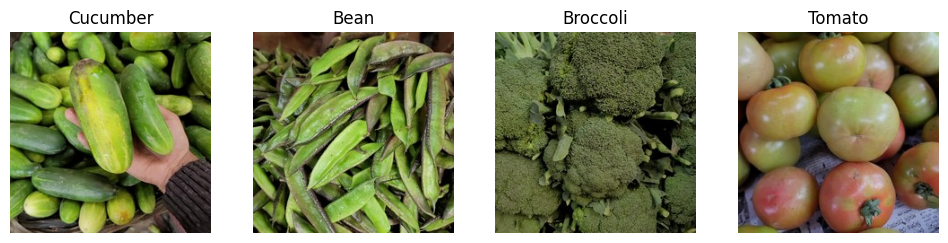

In [7]:


def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)
        

### Step 4. Prepare the Dataset

In [8]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 4000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [9]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Broccoli', 2: 'Cucumber', 3: 'Tomato'}


### Step 5. Building a CNN model

In [ ]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax')) # error opportunity

# print the model summary
model.summary()

2024-11-13 11:33:43.056510: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2024-11-13 11:33:43.114974: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251,396 (42.92 MB)

 Trainable params: 11,251,396 (42.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) #metrics needs to be a list - error opportunity
hist = model.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/100
125/468 ━━━━━━━━━━━━━━━━━━━━ 3:51 676ms/step - accuracy: 0.5406 - loss: 1.1005

2024-11-13 11:35:17.495862: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


468/468 ━━━━━━━━━━━━━━━━━━━━ 92s 191ms/step - accuracy: 0.6624 - loss: 0.8287 - val_accuracy: 0.8425 - val_loss: 0.4110
Epoch 2/100


2024-11-13 11:35:22.802175: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


468/468 ━━━━━━━━━━━━━━━━━━━━ 85s 181ms/step - accuracy: 0.9239 - loss: 0.2263 - val_accuracy: 0.9312 - val_loss: 0.2014
Epoch 3/100


2024-11-13 11:36:47.984279: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


468/468 ━━━━━━━━━━━━━━━━━━━━ 85s 180ms/step - accuracy: 0.9649 - loss: 0.1142 - val_accuracy: 0.9725 - val_loss: 0.0904
Epoch 4/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 84s 178ms/step - accuracy: 0.9754 - loss: 0.0749 - val_accuracy: 0.9663 - val_loss: 0.1174
Epoch 5/100


2024-11-13 11:39:36.609110: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


468/468 ━━━━━━━━━━━━━━━━━━━━ 88s 187ms/step - accuracy: 0.9904 - loss: 0.0332 - val_accuracy: 0.9787 - val_loss: 0.0737
Epoch 6/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 84s 179ms/step - accuracy: 0.9884 - loss: 0.0420 - val_accuracy: 0.9737 - val_loss: 0.0886
Epoch 7/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 83s 177ms/step - accuracy: 0.9895 - loss: 0.0381 - val_accuracy: 0.9563 - val_loss: 0.1345
Epoch 8/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - accuracy: 0.9952 - loss: 0.0173 - val_accuracy: 0.9762 - val_loss: 0.0842
Epoch 9/100


2024-11-13 11:45:15.376075: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


468/468 ━━━━━━━━━━━━━━━━━━━━ 82s 174ms/step - accuracy: 0.9953 - loss: 0.0169 - val_accuracy: 0.9700 - val_loss: 0.0950
Epoch 10/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - accuracy: 0.9917 - loss: 0.0277 - val_accuracy: 0.9663 - val_loss: 0.1201


**Model trained for 15 Epochs**

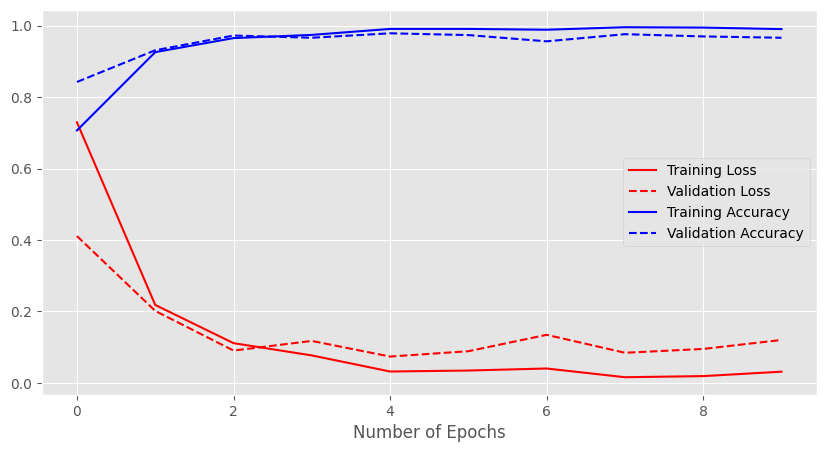

In [16]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [17]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.9683 - loss: 0.1155


[0.10650178045034409, 0.9674999713897705]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


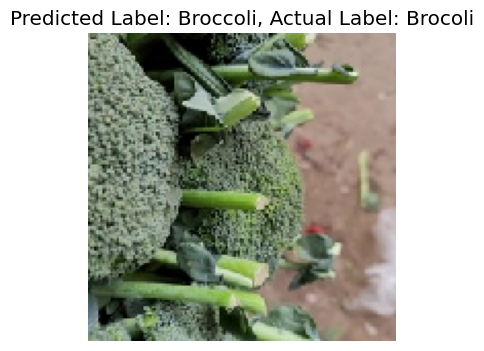

In [19]:
# Testing the Model
test_image_path = './images/test/Broccoli/1011.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Brocoli')

In [20]:
# Let's test the model on an image from an external source
!wget "https://www.dropbox.com/s/i020rz847u8bq09/beans.jpg?dl=0"

--2024-11-13 11:51:30--  https://www.dropbox.com/s/i020rz847u8bq09/beans.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/9uftcircwmqvounqhxnpz/beans.jpg?rlkey=o2lthgu0qdktffn093um6z7ti&dl=0 [following]
--2024-11-13 11:51:30--  https://www.dropbox.com/scl/fi/9uftcircwmqvounqhxnpz/beans.jpg?rlkey=o2lthgu0qdktffn093um6z7ti&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc49f503e39cdd08be86ccfee582.dl.dropboxusercontent.com/cd/0/inline/CeQeW-aJTNQ5PegaIIFac8rmv5tu_FhAnoJw3mWdMCZtT8R3sxvqy0XrvB_L7CjRpErxyUN28EF97rcAeLXa-JknELs37aDq1EBe7eaZ5cZg2cbPbLoJdgdlyvRhL4CzVDjVSBfNZxnNooc_NKK_yx2v/file# [following]
--2024-11-13 11:51:31--  https://uc49f503e39cdd08be86ccfee582.dl.dropboxusercontent.com/cd/0

In [21]:
!wget "https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg?dl=0"

--2024-11-13 11:51:37--  https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/hwp4o0k4doqiatggrafgv/potato_2.jpg?rlkey=y7jnxui9jtkvku0tccwo5u46d&dl=0 [following]
--2024-11-13 11:51:37--  https://www.dropbox.com/scl/fi/hwp4o0k4doqiatggrafgv/potato_2.jpg?rlkey=y7jnxui9jtkvku0tccwo5u46d&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc405c654042317906be5d16a320.dl.dropboxusercontent.com/cd/0/inline/CeQtv8gsk1gUKGYIyszPF36lfHeWLxgiZfiDC86rxpVdWc1JBCXv681vQLHpCij2ZlvZ6_xp_KFbhEyeeVZOoYzwdwMQuUT-ZAPtbrFlRZVj26E7tqJ6hUlnwoPj1HjG1qICEOOqVN7z4mmAwePSTcYr/file# [following]
--2024-11-13 11:51:38--  https://uc405c654042317906be5d16a320.dl.dropboxusercontent

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


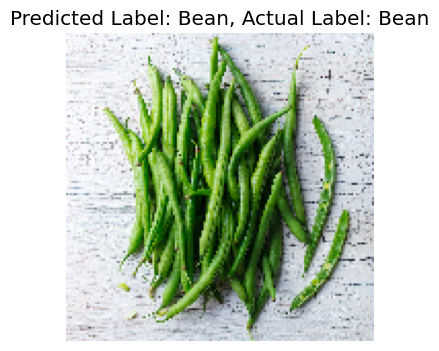

In [22]:
# Generate predictions for external images
external_image_path_1 = "./beans.jpg?dl=0"
generate_predictions(external_image_path_1, actual_label='Bean')

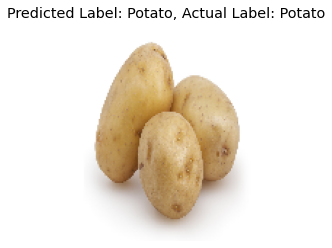

In [ ]:
# Generate predictions for external image
#external_image_path_2 = "./potato_2.jpg?dl=0"
#generate_predictions(external_image_path_2, actual_label='Potato')

## Sources

- Notebook source: https://www.kaggle.com/code/chitwanmanchanda/vegetable-image-classification-using-cnn
- Dataset: Ahmed, M. Israk & Mamun, Shahriyar & Asif, Asif Uz Zaman. (2021). DCNN-Based Vegetable Image Classification Using Transfer Learning: A Comparative Study. 10.1109/ICCCSP52374.2021.9465499. Available from: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset